<a href="https://colab.research.google.com/github/mayung17/Fast.ai/blob/main/Momo_or_Not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastai duckduckgo_search

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 11.3 MB/s eta 0:00:00


In [ ]:
# duck duck go search engine api
from duckduckgo_search import DDGS
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    images_obj= DDGS().images(keywords=term, max_results=max_images)
    urls=[]
    for i in images_obj:
        url=i["image"]
        urls.append(url)

    return urls

In [ ]:
# imports
from fastai.vision.all import *

In [ ]:
searches = 'sausage','momo'
path = Path('sausage_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

NameError: name 'Path' is not defined

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

7

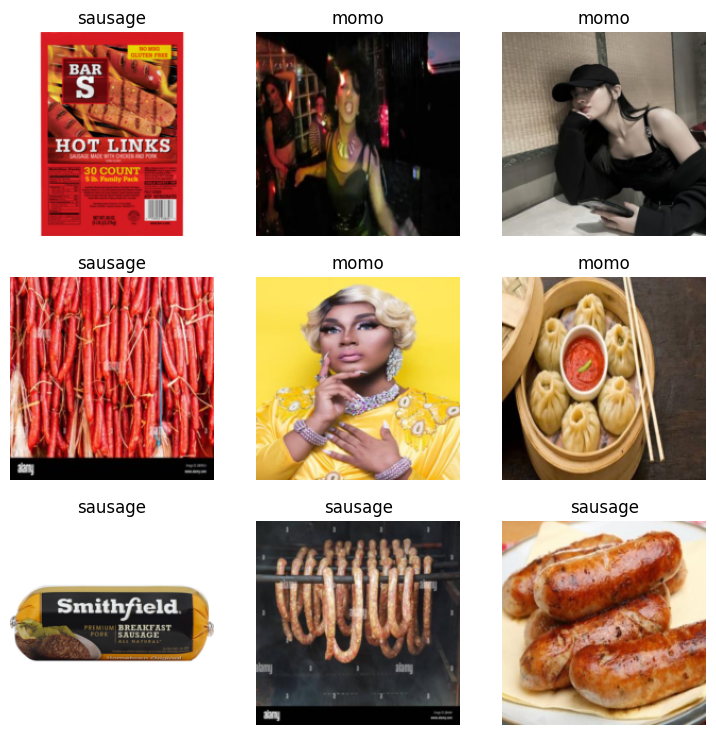

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch()

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 43.8MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.429300,0.895442,0.400000,00:17


epoch,train_loss,valid_loss,error_rate,time
0,0.586344,0.248748,0.100000,00:24
1,0.418979,0.093795,0.033333,00:30
2,0.346686,0.088040,0.033333,00:23


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
is_bird,_,probs = learn.predict(PILImage.create('dog.jpg'))
print(f"This is a: {is_bird}.")
print(_)
print(f"Probability it's a momo: {probs[0]:.4f}")

This is a: momo.
tensor(0)
Probability it's a bird: 0.8865


In [ ]:
# Load and display the image
img = mpimg.imread('momo.jpg')
plt.imshow(img)
plt.axis('off')  # Hide the axes
plt.show()